## Nedbørsoppgaven Del 6: Doble for-løkker

*Nedbørsoppgavene Del 1 til 6 er laget som støtte-oppgaver til oppgaven "Nedbør i Norge". Oppgaven "Nedbør i Norge" er en lengre oppgave som kommer innom mange forskjellige programerings-elementer. Intensjonen er at hvis man først gjør deloppgavene 1 til 6 og så går gjennom det nokså omfattende eksempelet på starten av oppgaven "Nedbør i Norge" så vil det programeringstekniske i oppgaven "Nedbør i Norge" være repetisjon, slik at man kan fokusere på den naturvitenskaplige tolkningen av dataene. På denne måten får man både trening i programmering og erfaring med hvordan det kan brukes til å studere og forstå naturvitenskaplige prosesser.*

-------------

I denne oppgaven gjør vi nesten det samme som i [Del 5](https://github.com/irendundas/EkteData/blob/main/Nedb%C3%B8rsoppgaven/Del5_Forl%C3%B8kke.ipynb) (gjennomsnitt over tiårs-bolker), men vi beregner gjennomsnittet for hver måned individuelt slik at vi står igjen med gjennomsnittlig temperatur for januar, februar, mars etc. i 1860-1870, og tilsvarende for alle tiårsperiodene fremover. Vi laster inn datasettet [TempBergen.txt](https://github.com/irendundas/EkteData/blob/main/data/TempBergen.txt) som har verdier for hver måned fra 1861 til 2021.

Utenom inndelingen i måneder er dette datasettet likt det vi brukte i Del 5 bortsettfra at 2021 er inkludert. Inspeksjon av datasettet viser at nesten alle verdiene i 2021 er NaN. Vi kutter derfor ut 2021 for å gjøre ting litt enklere, uten at vi egentlig ser vekk ifra noe særlig informasjon.

In [1]:
import numpy as np # for regneoperasjoner
import matplotlib.pyplot as plt # for figurer
import matplotlib

import sys
# Bytt ut stien under slik at den peker på hvor på din PC du har 
# lagret mappen "Funksjoner".
#sys.path.append(r"W:\Work\Documents\EkteData\EkteData\Funksjoner")
sys.path.append(r"C:\Users\iren_\Documents\EkteData\Funksjoner")
from EkteDataFunk import loadData # for filinnlasting

Før vi setter igang med datasettet med månedlig oppløsning  ser vi på tre korte eksempler:

#### Eksempel 1:
Print ut et sett med indekser: 
- først er `i=0`. Skriv ut en og en av verdiene i `range(4)`
- så er `i=1`. Skriv igjen ut en og en av verdiene i `range(4)`
- til slutt er `i=2`. Skriv igjen ut en og en av verdiene i `range(4)`

In [2]:
for i in range(3):
    for j in range(4):
        print('i=',i,'j=',j)

i= 0 j= 0
i= 0 j= 1
i= 0 j= 2
i= 0 j= 3
i= 1 j= 0
i= 1 j= 1
i= 1 j= 2
i= 1 j= 3
i= 2 j= 0
i= 2 j= 1
i= 2 j= 2
i= 2 j= 3


#### Eksempel 2: lagre verdier fra en dobbel for-løkke i en ny matrise "test"
Siden vi looper gjennom `range(3)` og `range(4)` må resultat-matrisen ha tre rader og fire kolonner. Når `i=0` og `j=0` plasseres resultatet i `test[0,0]`, altså øvre venstre hjørne av matrisen. Når f.eks. `i=2` og `j=3` plasseres resultatet i `test[2,3]`, altså nedre høyre hjørne. Husk **R**ace **C**ar (**R**ow **C**olumn).

In [3]:
test=np.zeros((3,4))
for i in range(3):
    for j in range(4):
        test[i,j]=i*j
        
test

array([[0., 0., 0., 0.],
       [0., 1., 2., 3.],
       [0., 2., 4., 6.]])

#### Eksempel 3: rekkefølgen av løkkene
Det er viktig å holde orden på rekkefølgen av løkkene. Lar vi f.eks. resultat-matrisen `test` ha dimensjoner (4, 3), vil ikke loopen fungere lengre. 

In [4]:
test=np.zeros((4,3))
for i in range(3):
    for j in range(4):
        test[i,j]=i*j
        


IndexError: index 3 is out of bounds for axis 1 with size 3

#### 1. Plot gjennomsnitts-temperaturen til hver måned i hver 10års-periode med en dobbel for-løkke
Tilbake til det ekte datasettet.

In [8]:
file='TempBergen.txt'
temp,tid = loadData(file)
print(temp.shape)

(161, 12)


Vi finner indeksene som deler inn 10års-periodene og tidsvektoren som i [Del 5](https://github.com/irendundas/EkteData/blob/main/Nedb%C3%B8rsoppgaven/Del5_Forl%C3%B8kke.ipynb).

In [9]:
# Finn indeksene som deler de 160 årene inn i 10års-perioder. 
start=0
stop=len(tid)
lengde=int(stop/10)+1 
    
ind10=np.linspace(start, stop, lengde)
ind10=ind10.astype(int)

In [10]:
# Tidsvektoren med midtpunktet av hver 10års-periode
T10=np.arange(tid[4],tid[-5],10)

In [11]:
# Denne listen med "strings" (tekst) bruker vi i "label" for hver linje
string=[
    'Jan','Feb','Mar','Apr','Mai','Jun','Jul','Aug','Sep','Okt','Nov','Des'
] 

Dersom vi ikke spesifiserer fargene til figuren plotter python i sine standard-farger. Disse er det ti av, så i vårt tilfelle, hvor vi vil plotte verdier som tilhører 12 måneder, vil punktene for januar og november, og februar og desember blir like. Derfor må vi lage en vektor med 12 ulike fargekoder på forhånd. 

Matplotlib har et bibilitek med fargekart, se f.eks. [her](https://matplotlib.org/stable/gallery/color/colormap_reference.html). 
Vi bruker karted "Paired" fordi dette har tolv diskrete farger. Man kan bygge sin egen farge-vektor med bedre farger, men for enkelhets skyld bruker vi dette nå. Alle farger kan beskrives med tre tall mellom 0 og 1 som angir hvor mye rødt, grønt, og blått du vil bruke (RGB). Under har vi fire tall (RGBA). Det siste tallet beskriver om fargen skal være gjennomsiktig (A for alpha). 1 er ikke gjennomsiktig, 0 er helt gjennomsiktig. 

In [12]:
n = 12 # 12 farger
colors = matplotlib.cm.Paired(np.linspace(0,1,n))
colors

array([[0.65098039, 0.80784314, 0.89019608, 1.        ],
       [0.12156863, 0.47058824, 0.70588235, 1.        ],
       [0.69803922, 0.8745098 , 0.54117647, 1.        ],
       [0.2       , 0.62745098, 0.17254902, 1.        ],
       [0.98431373, 0.60392157, 0.6       , 1.        ],
       [0.89019608, 0.10196078, 0.10980392, 1.        ],
       [0.99215686, 0.74901961, 0.43529412, 1.        ],
       [1.        , 0.49803922, 0.        , 1.        ],
       [0.79215686, 0.69803922, 0.83921569, 1.        ],
       [0.41568627, 0.23921569, 0.60392157, 1.        ],
       [1.        , 1.        , 0.6       , 1.        ],
       [0.69411765, 0.34901961, 0.15686275, 1.        ]])

In [13]:
T10.shape, temp.shape, ind10.shape

((16,), (161, 12), (17,))

For hver måned skal vi beregne gjennomsnittet over ti år: I cellen under midler vi over de ti første januar-månedene, så de neste ti januar-månedene, etc. Så midler vi over de ti første februar-månedene, så de neste ti februar-månedene, etc.

Derfor har vi for-løkken som itererer gjennom 12 indekser ytterst, og for-løkken som itererer gjennom tiårsperiodene innerst. På den måten gjør vi oss ferdig med en og en måned av gangen.

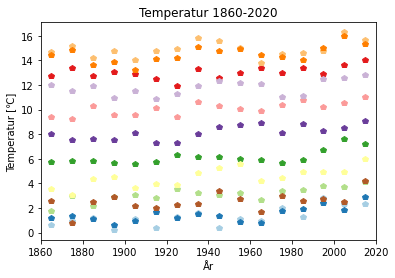

In [14]:
# for hver måned ...
for mo in range(12):
    # ... plot gjennomsnittstemperaturen til hver tiårsperiode
    for i in range(16):
        # Beregn gjennomsnittstemperaturen for perioden i måned "mo" mellom
        # år ind10[i] og ind10[i+1]
        tempmean=np.nanmean(temp[ind10[i]:ind10[i+1], mo])
        # Plot verdien du nettopp beregnet 
        plt.plot(T10[i], tempmean, color=colors[mo], marker='p')

    
plt.title('Temperatur 1860-2020')
plt.xlabel('År')
plt.ylabel('Temperatur [\u2103]')
plt.xlim([1860,2020])       

plt.show()

#### 2. Presenter figuren over som linjer istedet for punkter

Vi lager en matrise `MeanTemp10` som vi kan fylle gjennomsnittsverdiene inn i slik at vi etterpå kan lage et linjeplot. Den må ha dimensjoner 16 x 12: 16 10års-perioder, 12 måneder. 

I loopen under blir `meanTemp10[0,0]` nå gjennomsnittet over de ti første januarmånedene. `meanTemp10[-1,-1]` blir gjennomsnittet over de ti siste desembermånedene.

In [15]:
meanTemp10=np.zeros((16, 12)) # 16 x 12

for mo in range(12): # iterer gjennom månedene
    for i in range(16): # iterer gjennom tiårsperiodene
        meanTemp10[i,mo]=np.nanmean(temp[ind10[i]:ind10[i+1], mo]) 
    
meanTemp10.shape

(16, 12)

Vi kan nå lage en figur som viser innholdet i `meanTemp`.

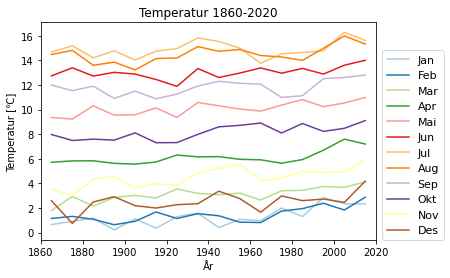

In [16]:
# for hver måned, plot 
for mo in range(12):
    plt.plot(T10, meanTemp10[:,mo], color=colors[mo], label=string[mo])

    
plt.title('Temperatur 1860-2020')
plt.xlabel('År')
plt.ylabel('Temperatur [\u2103]')
plt.xlim([1860,2020])

# Linjen under gjør at legend kommer utenfor figuren 
# og at teksten blir litt større. 
plt.legend(bbox_to_anchor=(1.02, 0, 0.2, 1), loc='lower left',  
           ncol=1, borderaxespad=0., fontsize=11)             

plt.show()

Denne figuren viser nå temperatur for hver måned som et gjennomsnitt av hver tiårsperiode mellom 1860 og 2020.

#### Oppgave 1
Bruk informasjon fra figuren til å diskutere spørsmålene under. Gjør også beregninger med datasettet om det hjelper deg i å gi et godt begrunnet svar.

- Hvordan har utviktlingen i temperatur i Bergen vært siden 1860? Er det forskjell på første og andre 80-års periode?
- Er det noen varme eller kalde perioder som skiller seg ut?
- Hvilken måned har størst endring?

Sammenlign dette med hva de tilsvarende figurene basert på årsgjennomsnitt i seksjon 5 i oppgaven [Del 5 forløkker](https://github.com/irendundas/EkteData/blob/main/Nedb%C3%B8rsoppgaven/Del5_Forl%C3%B8kke.ipynb) viser:

- Hvilket inntrykk gir det totale gjennomsnittet av endring i temperatur over tid i forhold til hvordan endringen når perioden er inndelt i måneder?
- I figurene i seksjon 5 var det en tydelig endring rundt 1940, og en sterk økning fra 1960. Hvor er disse elementene blitt av i figuren over?

#### Oppgave 2
Beregn gjennomsnittet over alle månedene og lag en ny figur der år 1860-2020 er langs x-aksen og gjennomsnittet av temperatur langs y-aksen). Svar på forrige spørsmål på nytt.

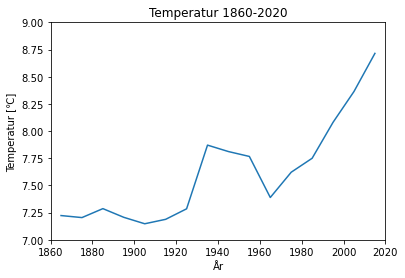

In [17]:
plt.plot(T10,np.mean(meanTemp10, axis=1))
    
plt.title('Temperatur 1860-2020')
plt.xlabel('År')
plt.ylabel('Temperatur [\u2103]')
plt.xlim([1860,2020])          
plt.ylim([7,9]) 

plt.show()

#### Oppgave 3
Gjør tilsvarende som i seksjon 2, men lag den doble for-løkken motsatt slik at man beregner gjennomsnittet av hver måned for en og en tiårsperiode av gangen. Lag en figur.

In [18]:
meanTemp10=np.zeros((len(ind10)-1,12)) # 17-1 x 12

for i in range(len(ind10)-1): # iterer gjennom tiårsperiodene
    for mo in range(12): # iterer gjennom månedene
        meanTemp10[i,mo]=np.nanmean(temp[ind10[i]:ind10[i+1],mo]) 
    
meanTemp10.shape

(16, 12)

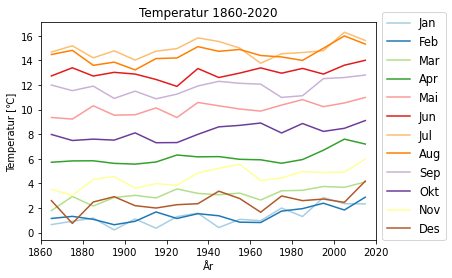

In [19]:
for mo in range(12):
    plt.plot(T10,meanTemp10[:,mo], color=colors[mo], label=string[mo])

    
plt.title('Temperatur 1860-2020')
plt.xlabel('År')
plt.ylabel('Temperatur [\u2103]')
plt.xlim([1860,2020])

# Linjen under gjør at legend kommer utenfor figuren 
# og at teksten blir litt større. 
plt.legend(bbox_to_anchor=(1.02, 0, 0.2, 1), loc='lower left',  
           ncol=1, borderaxespad=0.,fontsize=11.4)             

plt.show()

#### Oppgave 4

Identifiser måneden og 10årsperioden med høyest standardavvik. 

*Tips:* Bruk tilsvarende metode som da vi beregnet gjennomsnittsverider til hver 10års-periode for hver måned. 

In [21]:
stdTemp=np.zeros((16,12)) # 16 x 12

for i in range(16): # iterer gjennom tiårsperiodene
    for mo in range(12): # iterer gjennom månedene
        stdTemp[i,mo]=np.nanmean(temp[ind10[i]:ind10[i+1],mo]) 
    
stdTemp.shape

(16, 12)

In [25]:
np.where(stdTemp==np.max(stdTemp))

(array([14], dtype=int64), array([6], dtype=int64))

In [26]:
stdTemp[14, 6]

16.29

In [27]:
# dobbelsjekk at dette faktisk er den høyeste verdien
np.where(stdTemp>16.29)

(array([], dtype=int64), array([], dtype=int64))

Resultatet av cellen over er tomme array, altså er det ingen verdier i stdTemp som er høyere enn 16.29. Dette betyr at måned nr 6 i 10års-periode nr 14 har høyest standardavvik, altså juli 2000-2010.